# **CHALLENGE 1 : Kurtosis**

In [ ]:
%pip install seaborn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# **1. Definition**

 Kurtosis is a statistical measure of distribution that defines how heavily the tails of a distribution differ from the tails of a normal distribution whoes quantification is defined mathamtically by fourth standardized moment

### Kurtosis = 𝐸[(𝑋−𝜇)^4] / (𝜎^4)

 where 𝑋 is the random variable 𝜇 is the mean of 𝑋 and 𝜎 is the standard deviation of 𝑋

**References**

1. https://www.investopedia.com/terms/k/kurtosis.asp

# **2.Description**

Kurtosis quantifies the tail heaviness of a distribution measuring the extremity of data points compared to a normal distribution Mesokurtic distributions such as the normal distribution have zero excess kurtosis indicating moderate tail weight Leptokurtic distributions exhibit positive excess kurtosis suggesting heavy tails and a sharp peak examples include the Students t distribution and the exponential distribution Platykurtic distributions have negative excess kurtosis characterized by lighter thinner tails than the normal distribution with examples including uniform distributions and the Bernoulli distribution for a fair coin toss These distinctions help in understanding the probability of extreme values in different datasets

**References**
1. https://en.wikipedia.org/wiki/Kurtosis


 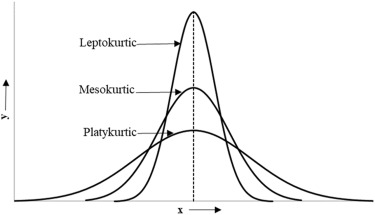

 Fig 1 : Kurtosis Visualization


# **3. Demonstration**

In this to numaricaly represent the data we have simulated three datasets in order to just focus on kurtosis challenge

We have randomly sampled mesokurtic from normal distribution leptokurtic from laplace and platykurtic data from uniform distribution

In [1]:
np.random.seed(42)
mesokurtic_data = np.random.normal(loc=0, scale=1, size=10000)
leptokurtic_data = np.random.laplace(loc=0, scale=1, size=10000)
platykurtic_data = np.random.uniform(low=-2, high=2, size=10000)
df = pd.DataFrame({
    'mesokurtic': mesokurtic_data,
    'leptokurtic': leptokurtic_data,
    'platykurtic': platykurtic_data
})
print(df.head())

   mesokurtic  leptokurtic  platykurtic
0    0.496714    -0.442372    -1.313961
1   -0.138264    -1.579693    -0.612791
2    0.647689    -1.940619     1.880407
3    1.523030    -1.668382     1.123151
4   -0.234153     0.181209    -0.869637


In [2]:
display(df.describe())

,mesokurtic,leptokurtic,platykurtic
count,10000.000000,10000.000000,10000.000000
mean,-0.002136,0.033400,-0.013270
std,1.003462,1.430152,1.147913
min,-3.922400,-9.248585,-1.999730
25%,-0.672591,-0.663425,-1.007905
50%,-0.002595,0.022796,-0.013142
75%,0.671081,0.722376,0.965693
max,3.926238,8.802569,1.998928


# **4. Diagram**

We can visualize this distribution to better understand its kurttosis

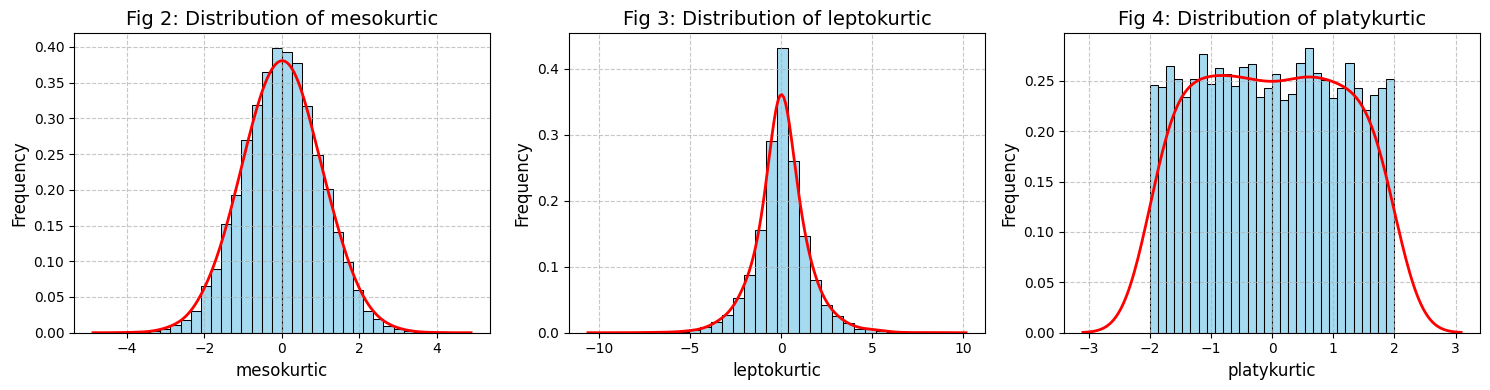

In [21]:
plt.figure(figsize=(15, 4))

for i, feature in enumerate(df.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], bins=30, color='skyblue', stat='density')
    sns.kdeplot(df[feature], color='red', linewidth=2, bw_adjust=2)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Fig {i+2}: Distribution of {feature}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can now visually confirm that mesokurtic resembles like normal distribution whereas leptokurtic has heavy tails and sharp peak and platykurtic has thinner tails which is as per details we have mentioned above.

# **5. Diagnosis**

To recognise that the problem exists we can compute mean and std deviation, then we can numarically test the kurtosis by using fourth standerdize moment formula

#### Skewness = 𝐸[(𝑋−𝜇)^4] / (𝜎^4)

where 𝑋 is the random variable 𝜇 is the mean of 𝑋 and 𝜎 is the standard deviation of 𝑋

In [11]:
feature_summaries = []

for feature in df.columns:
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    n = len(df[feature])
    kurtosis_val = (np.sum((df[feature] - mean_val)**4) / n) / (std_val**4)
    kurtosis_observation = ""
    if round(kurtosis_val, 0) > 3:
        kurtosis_observation = "The feature appears to be having heavier tails than normal distribution, indicating leptokurtic (sharper peak, heavier tails)."
    elif round(kurtosis_val, 0) < 3:
        kurtosis_observation = "The feature appears to be having lighter tails than normal distribution, indicating platykurtic (flatter peak, lighter tails)"
    else:
        kurtosis_observation = "The feature appears to be relatively similar to normal distribution."
    summary = f"""
    Feature: {feature}
    Mean: {mean_val:.2f}
    Median: {median_val:.2f}
    Standard Deviation: {std_val:.2f}
    Kurtosis: {kurtosis_val:.2f}
    Kurtosis Observation: {kurtosis_observation}
    """
    feature_summaries.append(summary)
for summary in feature_summaries:
    print(summary)
    print("-" * 30)


    Feature: mesokurtic
    Mean: -0.00
    Median: -1.19
    Standard Deviation: 1.00
    Kurtosis: 3.03
    Kurtosis Observation: The feature appears to be relatively similar to normal distribution.
    
------------------------------

    Feature: leptokurtic
    Mean: 0.03
    Median: -1.19
    Standard Deviation: 1.43
    Kurtosis: 5.86
    Kurtosis Observation: The feature appears to be having heavier tails than normal distribution, indicating leptokurtic (sharper peak, heavier tails).
    
------------------------------

    Feature: platykurtic
    Mean: -0.01
    Median: -1.19
    Standard Deviation: 1.15
    Kurtosis: 1.81
    Kurtosis Observation: The feature appears to be having lighter tails than normal distribution, indicating platykurtic (flatter peak, lighter tails)
    
------------------------------


This kurtosis value represents numarically that the problem exists and also measures the scale of the problem as we can observe that kurtosis for feature mesokurtic is 3.03 which resembles normal distribution whereas for leptokurtic is 5.86 which shows heavier tails than normal distribution but the platykurtic is shows lighter tails than normal distribution with value 1.81.

# **6.Damage**

Kurtosis is a statistical measure that describes the distribution of data points in the tails of a dataset relative to a normal distribution High kurtosis means that a dataset has heavy tails or outliers while low kurtosis indicates lighter tails or lack of outliers Neglecting to address extreme kurtosis in data analysis can lead to several problems

### 1. Misinterpretation of Variability
Extreme values can lead to misunderstandings about the true variability of the data e.g. high kurtosis (leptokurtic distribution) suggests a large number of extreme values which might be crucial for certain analyses like risk assessment in finance

### 2. Impact on Statistical Tests
Many statistical tests assume normality of the data High or low kurtosis can affect the robustness of these tests leading to incorrect conclusions

### 3. Model Misfit
For predictive modeling not addressing kurtosis might result in poor model performance especially if the model assumes data normality (like linear regression) Models might become overly sensitive to outliers affecting predictions

### 4. Influence on Summary Statistics
Extreme kurtosis affects the mean and standard deviation which are measures that assume data symmetry and moderate tail weight This might lead to decisions based on biased estimates of these statistics

# **7. Direction**

Addressing kurtosis effectively in data involves employing methods that can either transform the data to reduce extreme kurtosis or adapt your analysis techniques to handle it

### 1. Data Transformations
Transformations can help reduce the effect of outliers and bring the distribution closer to normal impacting the kurtosis

Log Transformation is effective for reducing positive kurtosis best suited for data where all values are positive

Square Root Transformation is similar to log transformation but can be used when the data includes zeros

Inverse Transformation can be particularly useful when dealing with very high values skewing the distribution

Box-Cox Transformation is a parametric transformation that finds the best power transformation to reduce deviations from normality

### 2. Trimming or Winsorizing
These methods involve adjusting the dataset by removing or capping extreme values

Trimming (or Truncating) is method which involves cutting off the extreme values from both ends of the data distribution essentially removing the top and bottom 5% (or another percentage)

Winsorizing is similar to trimming but instead of removing the extremes the extreme values are set to a certain percentile value

### 3. Robust Statistical Methods
Using statistical methods that are less sensitive to outliers and extreme values can also be a way to deal with high kurtosis

Robust Descriptive Statistics use the median instead of the mean or the trimmed mean which can provide a better central location measure

Robust Regression Models in which techniques such as quantile regression or robust regression (like Huber regression) that do not assume normality and are less sensitive to outliers in the data

### 4. Outlier Detection and Treatment
Identifying and appropriately managing outliers can help in reducing the kurtosis

Outlier Detection Techniques like Z-score, IQR (Interquartile Range) or DBSCAN (Density-Based Spatial Clustering of Applications with Noise) could be used for identifying outliers

### 5. Increase Sample Size
Sometimes the apparent high kurtosis is a result of a small sample size which may not adequately represent the underlying population distribution

### 6. Re examine the Data Source and Collection Methods
Ensure that the data does not suffer from biases introduced during collection

### 7. Simulation and Bootstrapping
Use these techniques to assess how sensitive your results are to the presence of high kurtosis

Bootstrapping is method that involves repeatedly sampling from the data set (with replacement) to estimate the distribution of an estimator and to get a better understanding of the variability and potential bias in your estimates due to outliers

Each of these methods has its own advantages and contexts where it is most useful The choice of method depends on the nature of the data and the specific requirements of your analysis or predictive modeling


If we use these methods kurtosis will be addressed and resulting which following problems will be addressed

1. Misinterpretation of variability
Extreme values will be dealt accordingly which makes interpretation of variability better
2. Impact on statestical tests
Statestical tests normality assumption will hold true as we address kurtosis which will improve model results and provides us with more predictive power
3. Model misfit
Models normality assumption will hold true as we address kurtosis which will improve model results and provides us with more predictive power

So we have used log transformation to deal with kurtosis the code for which is written below

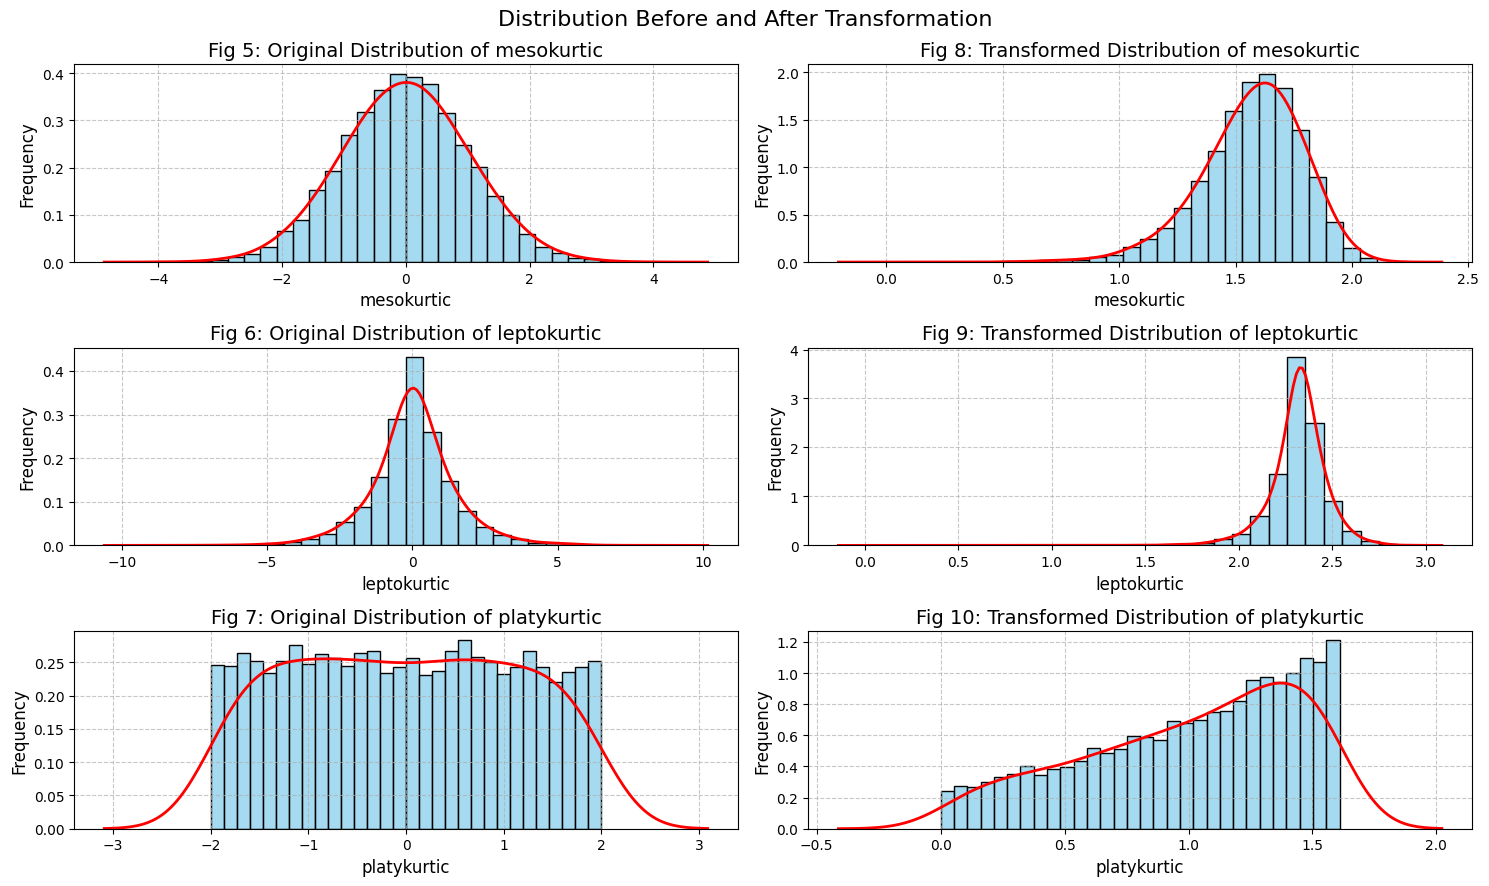

In [22]:
df_transformed = df.copy()
for feature in df.columns:
  min_val = df[feature].min()
  df_transformed[feature] = np.log(df[feature] - min_val + 1)

fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(15, 3 * len(df.columns)))
fig.suptitle("Distribution Before and After Transformation", fontsize=16)
for i, feature in enumerate(df.columns):
  sns.histplot(df[feature], bins=30, color='skyblue', stat='density', ax=axes[i, 0])
  sns.kdeplot(df[feature], color='red', linewidth=2, bw_adjust=2, ax=axes[i, 0])
  axes[i, 0].set_xlabel(feature, fontsize=12)
  axes[i, 0].set_ylabel('Frequency', fontsize=12)
  axes[i, 0].set_title(f'Fig {i+5}: Original Distribution of {feature}', fontsize=14)
  axes[i, 0].grid(True, linestyle='--', alpha=0.7)
  sns.histplot(df_transformed[feature], bins=30, color='skyblue', stat='density', ax=axes[i, 1])
  sns.kdeplot(df_transformed[feature], color='red', linewidth=2, bw_adjust=2, ax=axes[i, 1])
  axes[i, 1].set_xlabel(feature, fontsize=12)
  axes[i, 1].set_ylabel('Frequency', fontsize=12)
  axes[i, 1].set_title(f'Fig {i+8}: Transformed Distribution of {feature}', fontsize=14)
  axes[i, 1].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

These graph for before and after transformation shows that when we address kurtosis the distribution is transformed to be near normal distribution

# **8.References**

1. https://en.wikipedia.org/wiki/Kurtosis
2. https://www.investopedia.com/terms/k/kurtosis.asp